# Step-1 : Create a database Sales_data.db using Python

In [2]:
import sqlite3

In [10]:
new_conn = sqlite3.connect('sales_data.db')
cursor = new_conn.cursor()

cursor.execute (''' CREATE TABLE sales (id INTEGER PRIMARY KEY ,
                                 product TEXT,
                                 quantity INTEGER,
                                 price REAL)''')

# Step-2 :Run SQL Querirs and Load  result in Pandas

In [17]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('sales_data.db')

query = '''
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''


df = pd.read_sql_query(query, conn)
conn.close()


print("Sales Summary:")
print(df)

Sales Summary:
   product  total_qty  revenue
0   Apples         17      8.5
1  Bananas         11      3.3
2  Oranges         12      4.8


In [12]:
sales_data = [
    ("Apples",10,0.5),
    ("Bananas",5,0.3),
    ("Oranges",8,0.4),
    ("Apples",7,0.5),
    ("Bananas",6,0.3),
    ("Oranges",4,0.4)
]

cursor.executemany("INSERT INTO sales (product,quantity,price) VALUES (?,?,?)" , sales_data)

new_conn.commit()
new_conn.close()

# Step-3 : Plot the Data Using Matplotlib

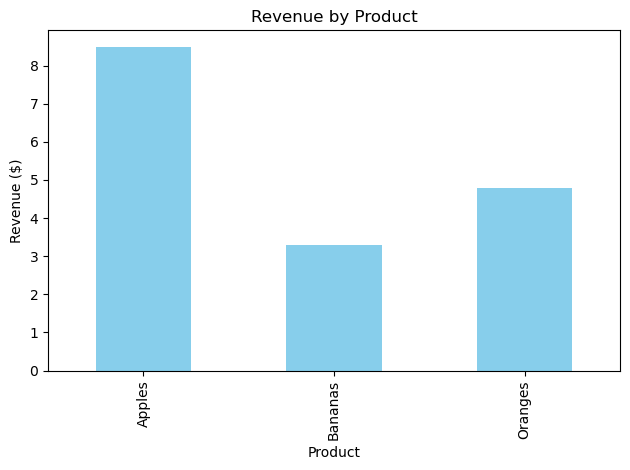

In [15]:
import matplotlib.pyplot as plt

# Create bar chart of revenue by product
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')

# Add labels and title
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()

# Show or save the chart
plt.savefig("sales_chart.png")  # Optional
plt.show()